In [ ]:
%pip install pandas==1.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.7 MB 14.5 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cal_data=pd.read_csv('/content/drive/MyDrive/Utsav Predictive/Copy of calendar.csv')
salestv_data=pd.read_csv('/content/drive/MyDrive/Utsav Predictive/Copy of sales_train_validation.csv')
ss_data=pd.read_csv('/content/drive/MyDrive/Utsav Predictive/Copy of sample_submission.csv')
#sellp_data=pd.read_csv('sell_prices.csv')

In [ ]:
timesteps=28
startDay=1300

In [ ]:
salestv_data.shape

(30490, 1919)

In [ ]:
salestv_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [ ]:
cal_data.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [ ]:
ss_data.tail()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
60975,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60976,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60977,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60978,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60979,FOODS_3_827_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# To reduce memory usage
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == 'float64']
    int_cols = [c for c in df if df[c].dtype in ['int32', 'int64']]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

In [ ]:
salestv_data_downcast = downcast_dtypes(salestv_data)

In [ ]:
# Making dates as row to get the data in exact format
salestv_data_downcast = salestv_data_downcast.T

In [ ]:
salestv_data_downcast.shape
salestv_data_downcast.head(8)

,0,1,2,3,4,5,6,7,8,9,...,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
id,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
item_id,HOBBIES_1_001,HOBBIES_1_002,HOBBIES_1_003,HOBBIES_1_004,HOBBIES_1_005,HOBBIES_1_006,HOBBIES_1_007,HOBBIES_1_008,HOBBIES_1_009,HOBBIES_1_010,...,FOODS_3_818,FOODS_3_819,FOODS_3_820,FOODS_3_821,FOODS_3_822,FOODS_3_823,FOODS_3_824,FOODS_3_825,FOODS_3_826,FOODS_3_827
dept_id,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,...,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3
cat_id,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,...,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS
store_id,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,...,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3
state_id,CA,CA,CA,CA,CA,CA,CA,CA,CA,CA,...,WI,WI,WI,WI,WI,WI,WI,WI,WI,WI
d_1,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0


In [ ]:
#remove first 6 rows as we do not need that to feed to our model
salestv_data_downcast = salestv_data_downcast[6+startDay:]
salestv_data_downcast.head(8)

,0,1,2,3,4,5,6,7,8,9,...,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
d_1301,0,0,0,0,2,1,0,3,1,0,...,2,0,1,2,19,0,0,0,0,2
d_1302,0,1,0,1,2,1,2,6,0,3,...,2,0,3,1,0,0,0,1,0,2
d_1303,0,1,0,6,0,6,0,13,0,1,...,2,2,0,0,5,0,1,0,0,0
d_1304,0,0,0,1,2,0,0,3,3,1,...,2,1,1,0,5,0,0,0,1,0
d_1305,0,0,0,2,0,0,0,45,0,0,...,2,3,1,0,5,0,0,0,0,1
d_1306,1,0,0,5,0,0,1,1,0,0,...,2,1,3,1,0,0,0,0,0,0
d_1307,0,0,0,4,1,0,0,0,2,0,...,0,0,0,0,1,0,0,0,0,0
d_1308,0,0,0,3,1,0,0,25,0,1,...,0,1,3,0,1,0,0,1,0,0


In [ ]:
# create a dataframe with zeores for 1969 days in the calendar - To store the knowledge if an event exist in the next day
daysBeforeEvent = pd.DataFrame(np.zeros((1969,1)))

In [ ]:
# "1" is assigned to the days before the event_name_1. 
for x, y in cal_data.iterrows():
    if x!=0 and (pd.isnull(cal_data['event_name_1'][x]) == False):
        daysBeforeEvent[0][x-1]=1
#    else if x==0 and (pd.isnull(cal_data['event_name_1'][x]) == False):
#        daysBeforeEvent[0][x]=1

In [ ]:
# daysBeforeEvent is used as a feature and also to train and test the validations 
daysBeforeEventTest = daysBeforeEvent[1941:1969]
daysBeforeEventTrain = daysBeforeEvent[startDay:1913]


In [ ]:
daysBeforeEventTrain.columns = ['oneDayBeforeEvent']
daysBeforeEventTrain.index = salestv_data_downcast.index

In [ ]:
final_data = pd.concat([salestv_data_downcast, daysBeforeEventTrain], axis=1)


In [ ]:
# Feature scaling
# Scale the features using MinMaxScaler in range 0-1
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
final_data_scaled = sc.fit_transform(final_data)


In [ ]:
final_data_scaled.shape

(613, 30491)

Here is the important part. "X_train" and "y_train" data is created. For each X_train item, 14 past days' sales and 14 daysBeforeEvent feature are included. So one element of X_train's shape is (14, 30491). For y_train we are predicting one day sales of 30490 items therefore one element of y_train's shape is (1, 30490)

![image.png](attachment:image.png)

In [ ]:
# creating sequences for LSTM model training
X_train = []
y_train = []
timesteps = 28

for i in range(timesteps,1942-startDay):
    X_train.append(final_data_scaled[i-timesteps:i])
    y_train.append(final_data_scaled[i][0:30490])

In [62]:
final_data.columns

Index([                  0,                   1,                   2,
                         3,                   4,                   5,
                         6,                   7,                   8,
                         9,
       ...
                     30481,               30482,               30483,
                     30484,               30485,               30486,
                     30487,               30488,               30489,
       'oneDayBeforeEvent'],
      dtype='object', length=30491)

In [ ]:
del final_data_scaled
del cal_data

NameError: ignored

# LSTM model - keras implementation https://www.youtube.com/watch?v=WCUNPb-5EYI

In [ ]:
from  datetime import datetime, timedelta
import gc
import numpy as np
import pandas as pd
import tensorflow
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

import os, sys, gc, time, warnings, pickle, psutil, random

warnings.filterwarnings('ignore')

In [ ]:


X_train = np.array(X_train)
y_train = np.array(y_train)

inputs = final_data[-timesteps:]
inputs = sc.transform(inputs)
print(inputs)

[[0.2        0.2        0.         ... 0.25       0.58333333 0.        ]
 [0.         0.         0.         ... 0.         0.25       0.        ]
 [0.         0.         0.         ... 0.         0.08333333 0.        ]
 ...
 [0.         0.         0.16666667 ... 0.25       0.         0.        ]
 [0.2        0.         0.16666667 ... 0.08333333 0.         0.        ]
 [0.2        0.         0.16666667 ... 0.25       0.         0.        ]]


In [ ]:
X_train.shape

(585, 28, 30491)

In [ ]:
y_train.shape

(585, 30490)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import tensorflow.keras.backend as K

# Initializing the RNN
regressor = Sequential()

# Adding first LSTM layer and some dropout regularization
layer_1_units = 40
regressor.add(LSTM(units=layer_1_units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

# Adding second LSTM layer and some dropout regularization
layer_2_units = 300
regressor.add(LSTM(units=layer_2_units, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding third LSTM layer and some dropout regularization``
layer_3_units = 300
regressor.add(LSTM(units=layer_3_units))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=30490))

# Compiling the RNN
regressor.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')
    
#Fitting the RNN to the trainign set
epoch_no = 5
batch_size_RNN = 44
regressor.fit(X_train, y_train, epochs=epoch_no, batch_size=44)



Epoch 1/5
14/14 [==============================] - 11s 80ms/step - loss: 0.0849
Epoch 2/5
14/14 [==============================] - 1s 72ms/step - loss: 0.0326
Epoch 3/5
14/14 [==============================] - 1s 72ms/step - loss: 0.0267
Epoch 4/5
14/14 [==============================] - 1s 71ms/step - loss: 0.0253
Epoch 5/5
14/14 [==============================] - 1s 69ms/step - loss: 0.0246


* Here is again an important part.
* We are using last 14 days in order to predict day 1915 sales.
* In order to predict 1916th day, 13 days from our input data and 1 day from our prediction are used. After that we slide the window one by one.  
    12 days from input data + 2 days from our prediction to predict 1917th day  
    11 days from input data + 3 days from our prediction to predict 1918th day  
    .....  
    14 days our prediction to predict last 1941th day sale  

![image.png](attachment:image.png)

In [ ]:
X_test = []
X_test.append(inputs[0:timesteps])
X_test = np.array(X_test)
print(X_test.shape)
#print(X_test[0, 1:14].shape)
predictions = []

for j in range(timesteps, timesteps+28):
    predicted_sales = regressor.predict(X_test[0, j-timesteps:j].reshape(1, timesteps,30491))
    testInput = np.column_stack((np.array(predicted_sales), daysBeforeEventTest[0][1941+j-timesteps]))
    X_test = np.append(X_test, testInput).reshape(1, j+1, 30491)
    predicted_sales = sc.inverse_transform(testInput)[:,0:30490]
    predictions.append(predicted_sales)
print(testInput.shape)

(1, 28, 30491)
1/1 [==============================] - 0s 20ms/step
(1, 30491)


# File submission

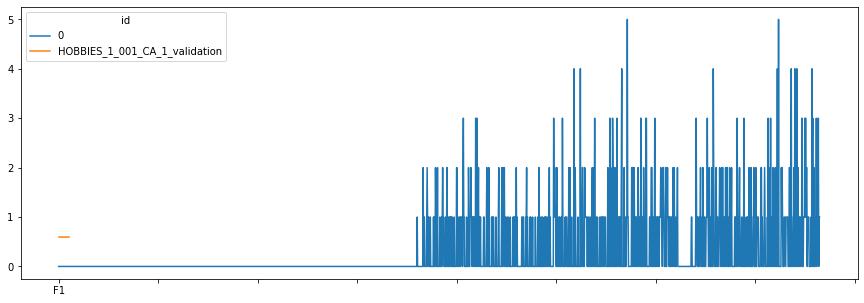

In [ ]:
import time
import matplotlib.pyplot as plt

submission = pd.DataFrame(data=np.array(predictions).reshape(28,30490))
submission = submission.T
submission = pd.concat((submission, submission), ignore_index=True)


sample_submission = pd.read_csv('/content/drive/MyDrive/Utsav Predictive/Copy of sample_submission.csv')
idColumn = sample_submission[['id']]
submission[['id']] = idColumn

cols = list(submission.columns)
cols = cols[-1:]+cols[:-1]
submission = submission[cols]

colsdname = ['id'] + [f'F{i}' for i in range(1,29)]
submission.columns = colsdname

currrentDatTime = time.strftime('%d%m%Y_%H%M%S')
submission.to_csv('submission.csv', index=False)

fig,axs = plt.subplots(figsize=(15,5))
d_cols = [c for c in salestv_data.columns if 'd_' in c]
salestv_data[salestv_data['id'] == 'HOBBIES_1_001_CA_1_validation'][d_cols].T.plot(ax=axs)
submission[submission['id'] == 'HOBBIES_1_001_CA_1_validation'].set_index('id').T.plot(ax=axs)

In [59]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
from lazypredict.Supervised import LazyRegressor

In [ ]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)